In [1]:
from signalling import *
import seaborn as sns 
import imageio
from matplotlib import pyplot as plt
from matplotlib import animation

In [3]:
game = Game(10, [10,10], [10,10])
optimizer = RElearning( discount=0)

In [7]:
optimizer.apply(0,2)

2

In [10]:
game.train(eval_size=1, threshold=1e-6, optimizer=optimizer)

Epoch 1, last 1 epochs reward: 0.0
8 1 4 0
Epoch 2, last 1 epochs reward: 1.0
6 0 6 1
Observation to message mapping:


AttributeError: &#39;Agent&#39; object has no attribute &#39;message_weights&#39;

In [9]:
print(game.sender.actions_values)

[[0.e+00 0.e+00 1.e-06 1.e-06 1.e+00 1.e-06 1.e-06 1.e-06 1.e-06 0.e+00]
 [0.e+00 1.e-06 0.e+00 1.e-06 1.e-06 1.e-06 0.e+00 1.e-06 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-06]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-06 1.e+00 1.e-06 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 1.e-06 0.e+00 1.e-06 0.e+00 0.e+00 0.e+00 0.e+00]
 [1.e-06 0.e+00 1.e-06 1.e-06 1.e-06 1.e-06 0.e+00 0.e+00 1.e-06 0.e+00]
 [1.e+00 0.e+00 0.e+00 0.e+00 1.e-06 0.e+00 1.e-06 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00 1.e-06 0.e+00 0.e+00]
 [0.e+00 1.e-06 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]]


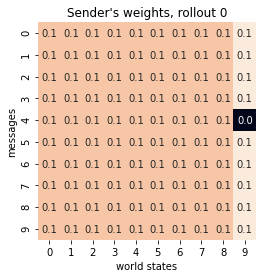

Epoch 0, last 100 epochs reward: -0.01
4 9 7 -1


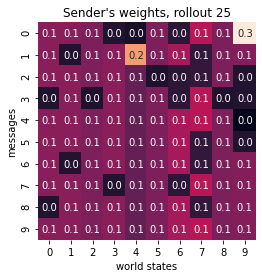

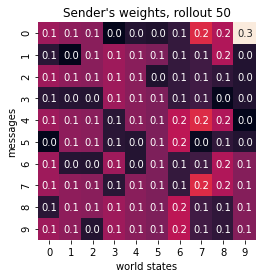

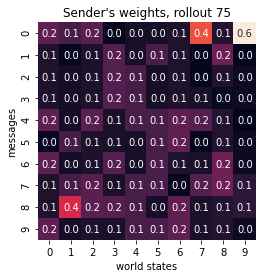

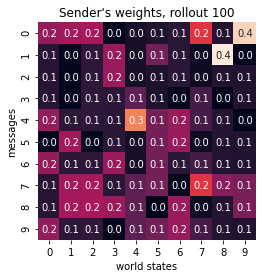

Epoch 100, last 100 epochs reward: -0.76
1 8 6 -1


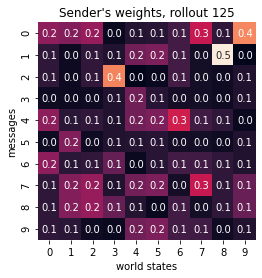

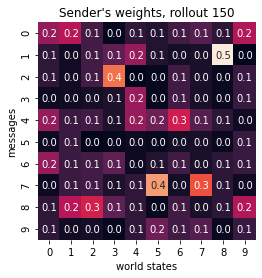

KeyboardInterrupt: 

In [6]:
sender, receiver = Sender(10, 10), Receiver(10, 10)
world = World(10)
past_rewards = 0
matrices = []
for epoch in range(3000):
    world_state = world.emit_state()
    message = sender.send_message(world_state)
    action = receiver.act(message)
    reward = world.evaluate_action(action)
    receiver.learn_from_feedback(reward)
    sender.learn_from_feedback(reward)
    past_rewards += reward
    if epoch % 25 == 0:
        plt.tight_layout(pad=0)
        plot = sns.heatmap(
            np.exp(receiver.action_weights)/np.exp(receiver.action_weights).sum(axis=0), 
            square=True, cbar=False, annot=True, fmt='.1f'
        ).get_figure()
        plt.xlabel('messages')
        plt.ylabel('actions')
        plt.title(f'Receiver\'s weights, rollout {epoch}')
        plt.savefig(f"receiver_{epoch}.png")
        plt.clf()
        
        plot = sns.heatmap(
            np.exp(sender.message_weights)/np.exp(sender.message_weights).sum(axis=0), 
            square=True, cbar=False,annot=True, fmt='.1f'
        ).get_figure()
        plt.xlabel('world states')
        plt.ylabel('messages')
        plt.title(f'Sender\'s weights, rollout {epoch}')
        plt.show()
           
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, last 100 epochs reward: {past_rewards/100}')
        print(world_state, message, action, reward)
        past_rewards = 0

print("Observation to message mapping:")
print(sender.message_weights.argmax(1))
print("Message to action mapping:")
print(receiver.action_weights.argmax(1))

In [8]:
def make_gif(filename_base):
    images = []
    for filename in [f'{filename_base}_{i}.png' for i in range(3000) if i % 25 == 0]:
        images.append(imageio.imread(filename))
    imageio.mimsave(f'{filename_base}.gif', images)
    
make_gif('sender')
make_gif('receiver')

NameError: name 'Game' is not defined